In [1]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

In [7]:
def HeaderMaker(PatientFile):
#     df_cleaned = pd.read_csv('/data/ortho/' + PatientFile, header=None)
    df_cleaned = pd.read_csv(PatientFile, header=None)

    df_cleaned = df_cleaned.rename(columns={0: "thorax_r_x", 1: "thorax_r_y", 2: "thorax_r_z"})
    df_cleaned = df_cleaned.rename(columns={3: "clavicula_r_x", 4: "clavicula_r_y", 5: "clavicula_r_z"})
    df_cleaned = df_cleaned.rename(columns={6: "scapula_r_x", 7: "scapula_r_y", 8: "scapula_r_z"})
    df_cleaned = df_cleaned.rename(columns={9: "humerus_r_x", 10: "humerus_r_y", 11: "humerus_r_z"})
    df_cleaned = df_cleaned.rename(columns={12: "ellebooghoek_r"})
    df_cleaned = df_cleaned.rename(columns={15: "thorax_l_x", 16: "thorax_l_y", 17: "thorax_l_z"})
    df_cleaned = df_cleaned.rename(columns={18: "clavicula_l_x", 19: "clavicula_l_y", 20: "clavicula_l_z"})
    df_cleaned = df_cleaned.rename(columns={21: "scapula_l_x", 22: "scapula_l_y", 23: "scapula_l_z"})
    df_cleaned = df_cleaned.rename(columns={24: "humerus_l_x", 25: "humerus_l_y", 26: "humerus_l_z"})
    df_cleaned = df_cleaned.rename(columns={27: "ellebooghoek_l"})
    
    return df_cleaned

def VisualizeItems(items, x, y, z):
    for i in items:
        
        
        try:
            splitted = i.split('.')[0].split('_')
            Cat = splitted[0]
            pat = splitted[1]
            meting = splitted[2]
            oef = splitted[3]
        except(IndexError):
            oef = 'failed'
        print(i)
        data = HeaderMaker(i)

        xlist = data[x]
        ylist = data[y]
        zlist = data[z]
        
        
        index = 0
        NewList = []
        for num, ColumnList in enumerate([xlist, ylist, zlist]):
            templist = []
            for index in range(1, len(ColumnList)):
                try:
                    vorige = ColumnList.iloc[index-1]
                    volgende = ColumnList.iloc[index+1]
                    templist.append(vorige - volgende)
                except(IndexError):
                    templist.append(0)
                    
            NewList.append({'x':list(ColumnList[1:]), 'y':templist})
#             return NewList
#             break
        
                
        for item in NewList:
            print('NewItems')
            fig = plt.figure()
            ax = fig.gca()
            for i in range(0, len(item['x']), 1):
                plt.plot(item['x'][i:i+2], item['y'][i:i+2], 'ro-')
            cricle = plt.Circle((item['x'][0], item['y'][0]), 2, color='y')
            ax.add_artist(cricle)
            plt.title('cat: %s pat: %s oef: %s meting: %s' % (Cat, pat, oef, meting))
            
            TotaleOppervlakte = 0
            for index, CurrentXValue in enumerate(item['x']):
                if index == 0:
                    continue
                
                PreviousXValue = item['x'][index - 1]
                
                if CurrentXValue > PreviousXValue:
                    Multiplier = 1
                elif CurrentXValue < PreviousXValue:
                    Multiplier = -1
                else:
                    # Zelfde X waarde, dus geen oppervlakte
                    continue
                
                LowestValue = min(item['y'])
                CurrentyValue = item['y'][index]
                PreviousyValue = item['y'][index - 1]
                
                # Vierkant oppervlakte berekenen
                breedte = abs(abs(CurrentXValue) - abs(PreviousXValue))
                hoogte = abs(LowestValue) + abs(min([CurrentyValue, PreviousyValue]))
                Oppervlakte = breedte * hoogte
                
                # Driehoek oppervlakte berekeken
                hoogteDrie = abs(CurrentyValue - PreviousyValue)
                Oppervlakte = Oppervlakte + 0.5 * hoogteDrie * breedte
                
                TotaleOppervlakte += Oppervlakte * Multiplier
            plt.text(0,0, str(abs(TotaleOppervlakte)))
                
                
                
                
            
# #         plt.ylim((-180,180))
#         plt.plot(NewList[0], color = 'red')
#         plt.plot(NewList[1], color = 'blue')
#         plt.plot(NewList[2], color = 'green')
#         plt.legend()
        
    plt.tight_layout()  
    plt.show()

def CreateList(keywordslist):
    allitems = listdir('/data/ortho/Cleaned Train/')
    filteredlist = []
    for i in keywordslist:
        for x in allitems:
            if (i in x):
                filteredlist.append(x)
        allitems = filteredlist
        filteredlist = []
    finallist = []
    for i in allitems:
        finallist.append('/data/ortho/Cleaned Train/%s' % i)
    return finallist

/data/ortho/Cleaned Train/Cat2_pat22_meting10_oef2_split2.csv
NewItems
NewItems
NewItems
/data/ortho/Cleaned Train/Cat2_pat28_meting20_oef3_split1.csv
NewItems
NewItems
NewItems
/data/ortho/Cleaned Train/Cat2_pat12_meting10_oef2_split1.csv
NewItems
NewItems
NewItems
/data/ortho/Cleaned Train/Cat2_pat32_meting20_oef2_split1.csv
NewItems
NewItems
NewItems
/data/ortho/Cleaned Train/Cat2_pat4_meting20_oef2_split1.csv
NewItems
NewItems
NewItems
/data/ortho/Cleaned Train/Cat2_pat11_meting10_oef2_split1.csv
NewItems
NewItems
NewItems
/data/ortho/Cleaned Train/Cat2_pat32_meting20_oef3_split1.csv
NewItems
NewItems
NewItems
/data/ortho/Cleaned Train/Cat2_pat21_meting20_oef4_split1.csv
NewItems
NewItems
NewItems
/data/ortho/Cleaned Train/Cat2_pat2_meting10_oef2_split1.csv
NewItems
NewItems
NewItems
/data/ortho/Cleaned Train/Cat2_pat14_meting20_oef2_split1.csv
NewItems
NewItems
NewItems
/data/ortho/Cleaned Train/Cat2_pat8_meting10_oef2_split1.csv
NewItems
NewItems
NewItems
/data/ortho/Cleaned Trai

EmptyDataError: No columns to parse from file

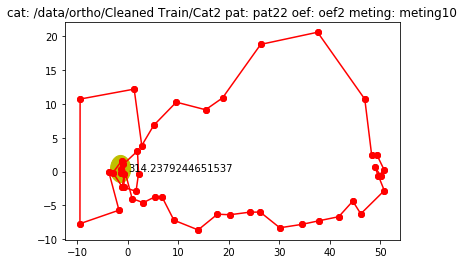

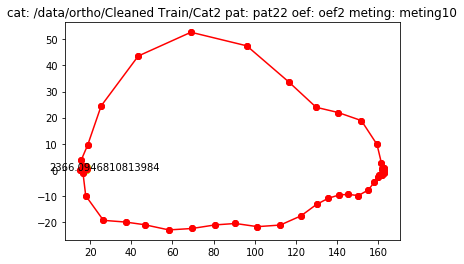

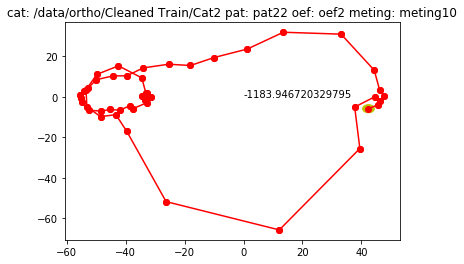

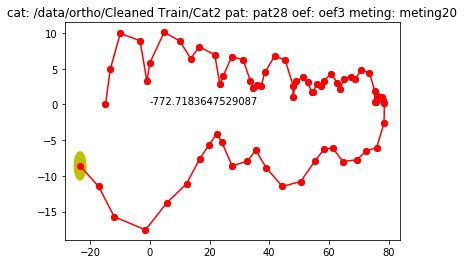

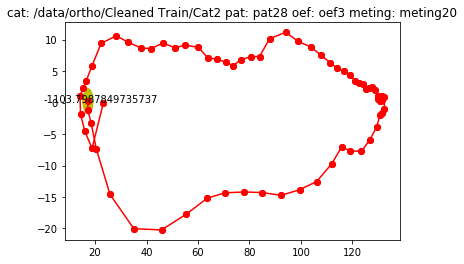

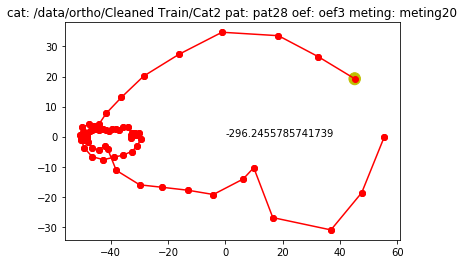

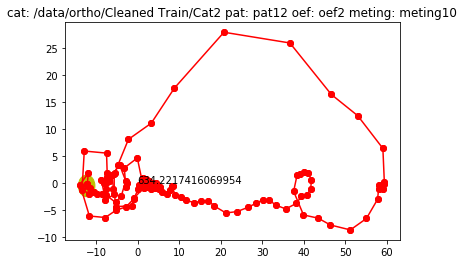

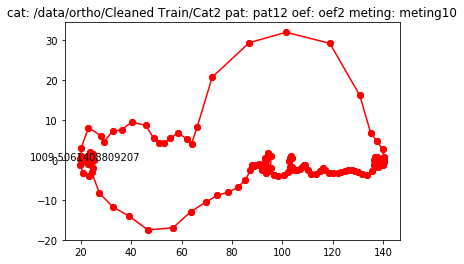

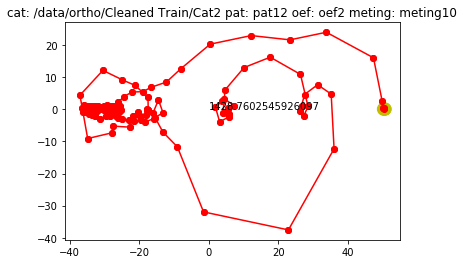

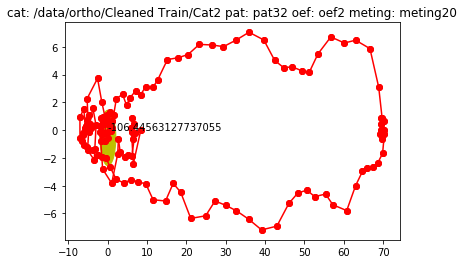

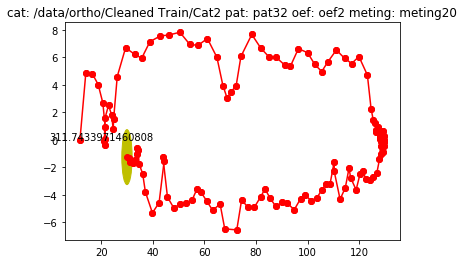

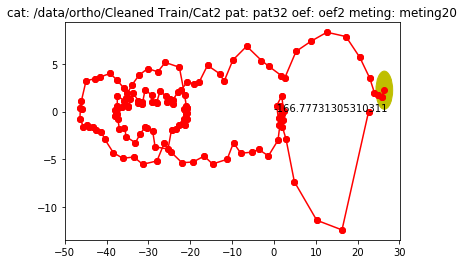

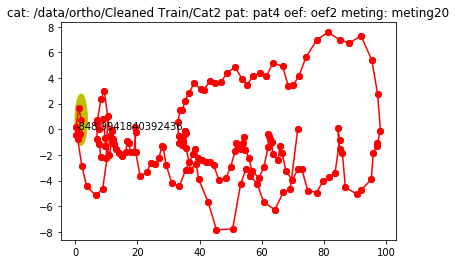

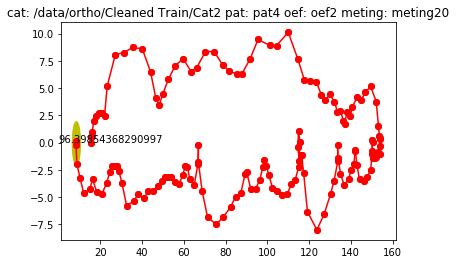

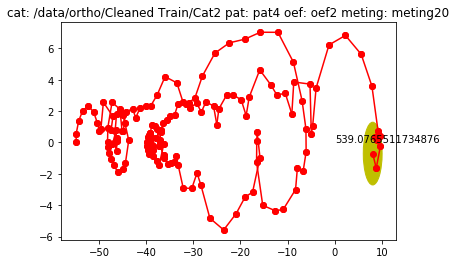

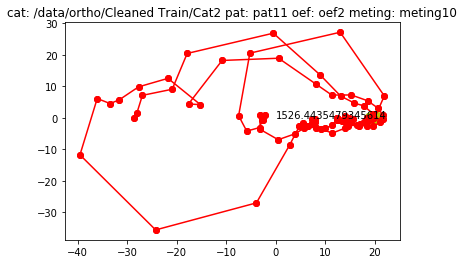

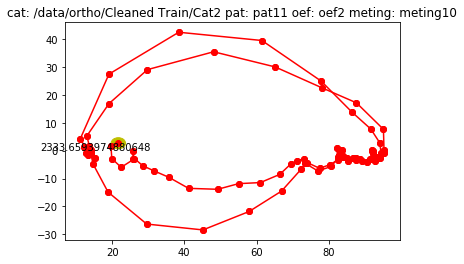

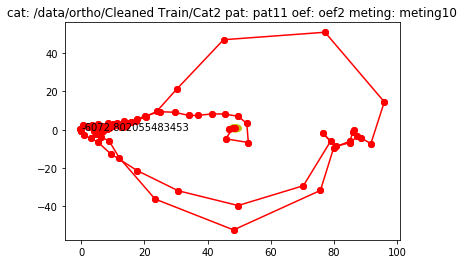

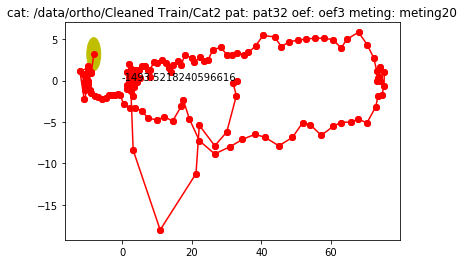

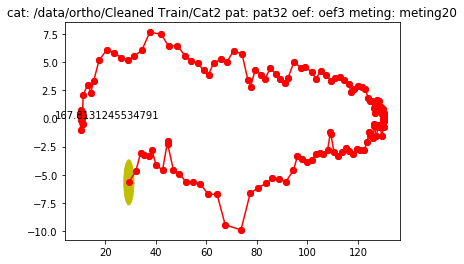

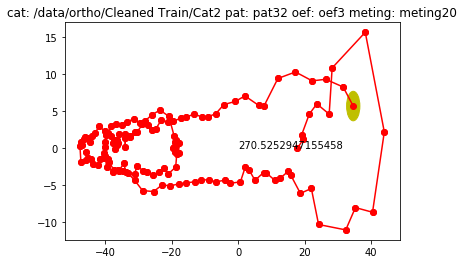

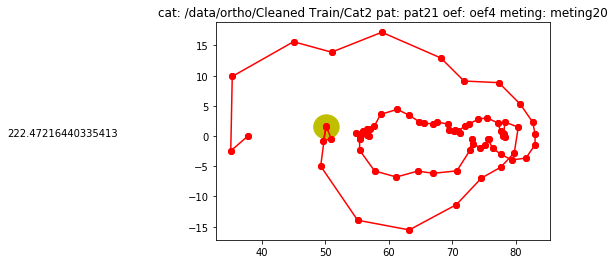

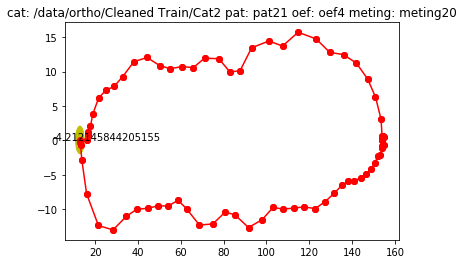

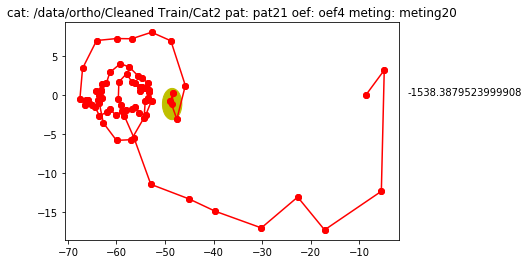

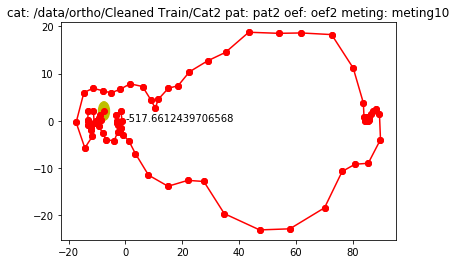

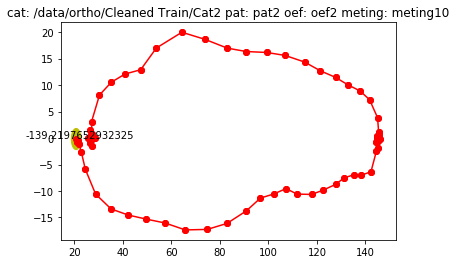

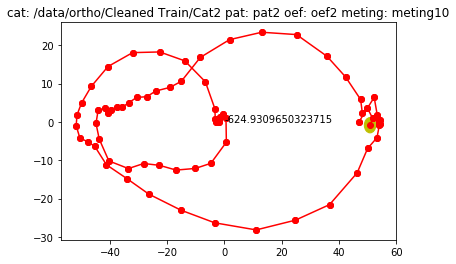

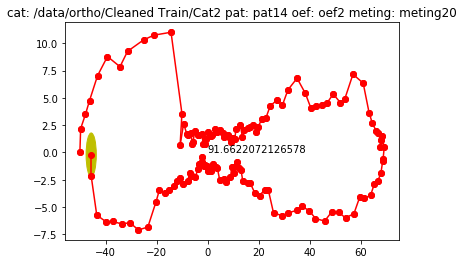

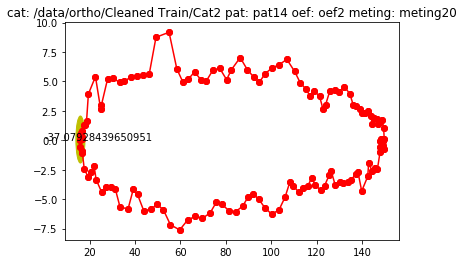

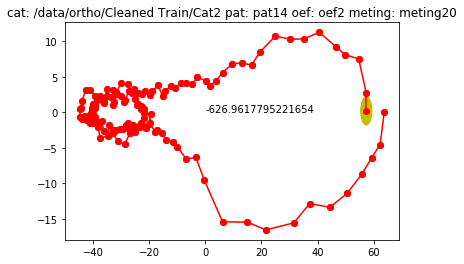

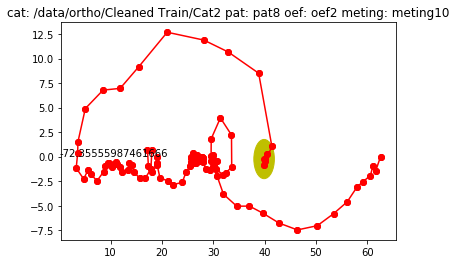

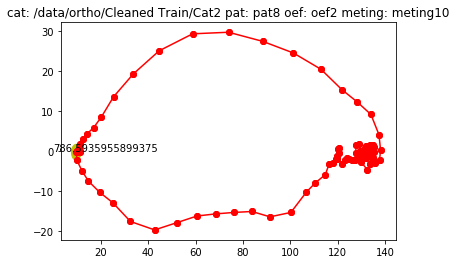

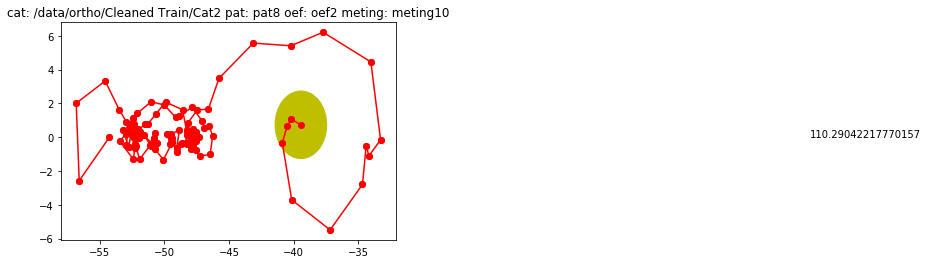

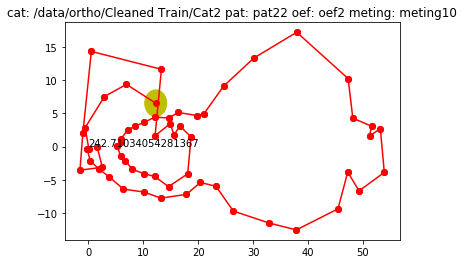

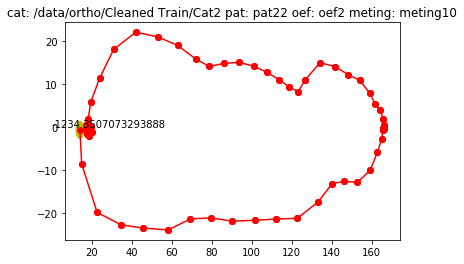

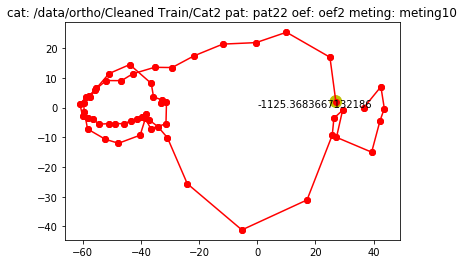

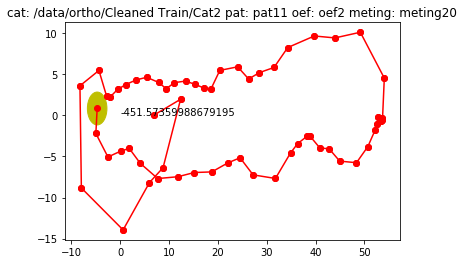

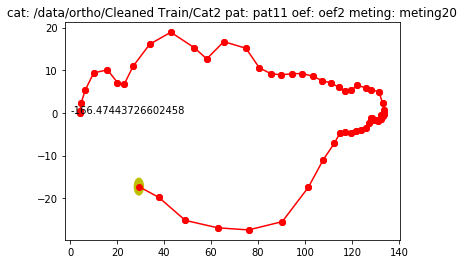

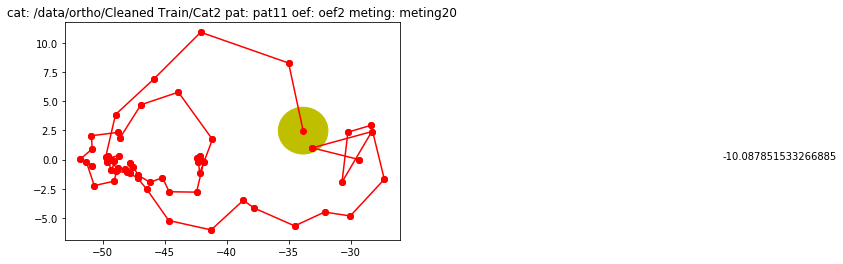

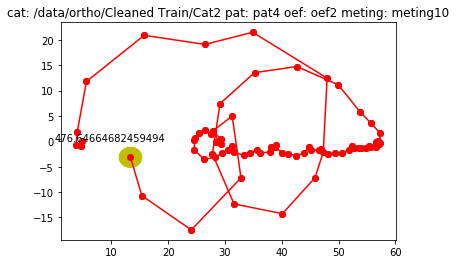

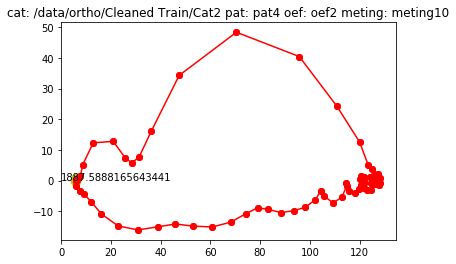

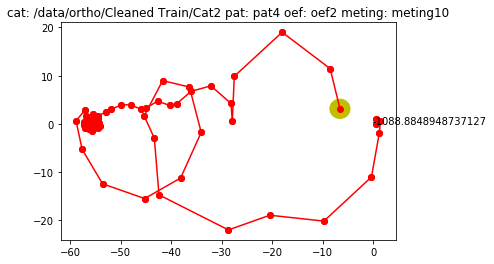

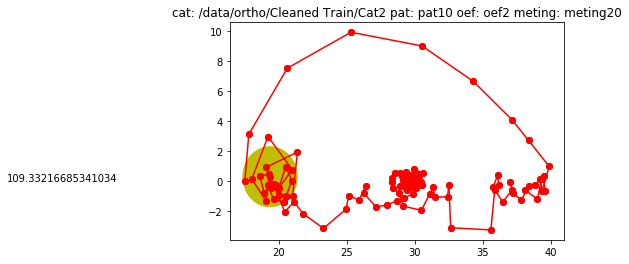

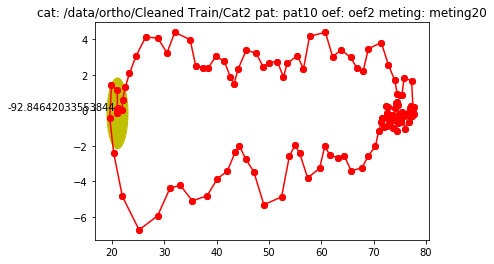

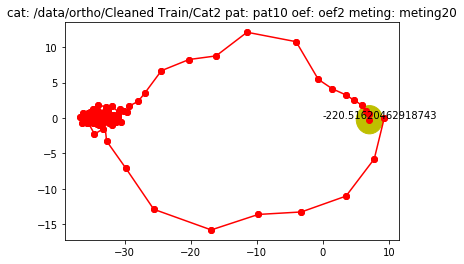

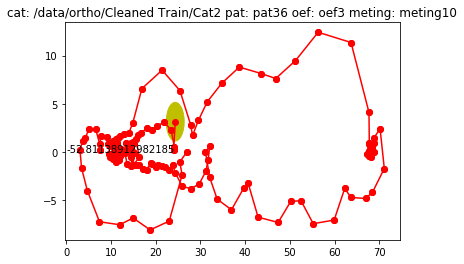

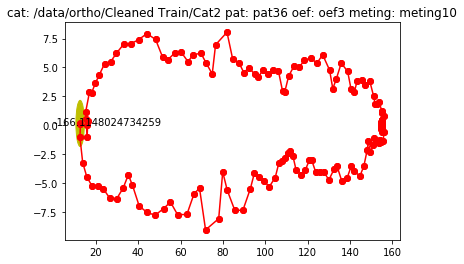

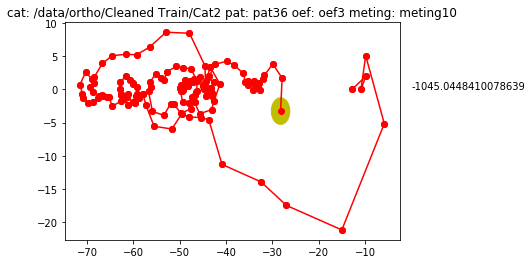

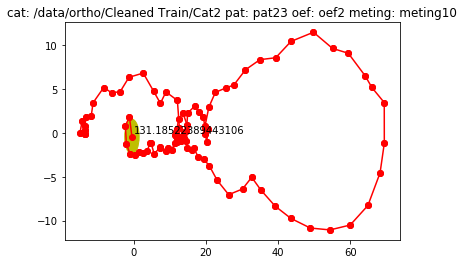

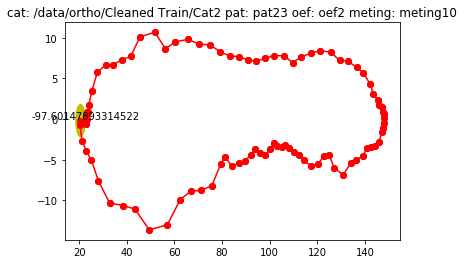

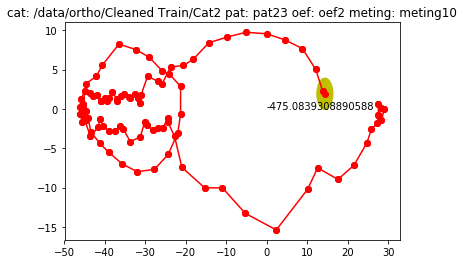

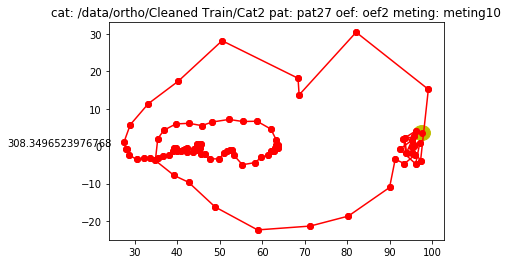

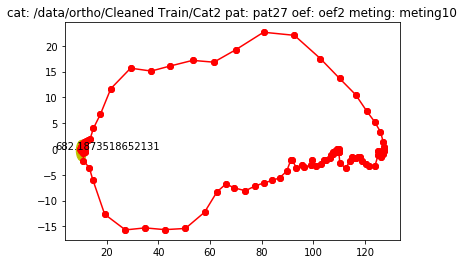

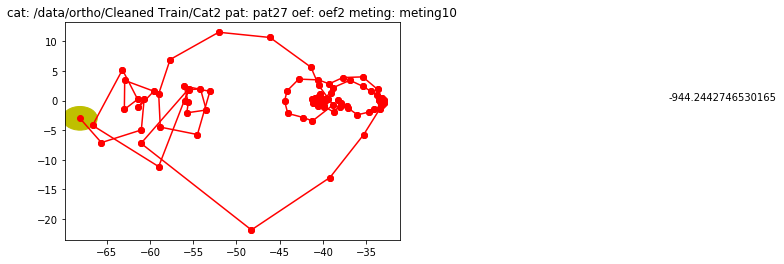

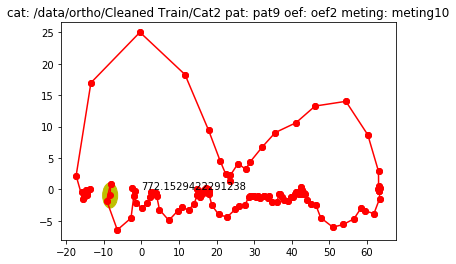

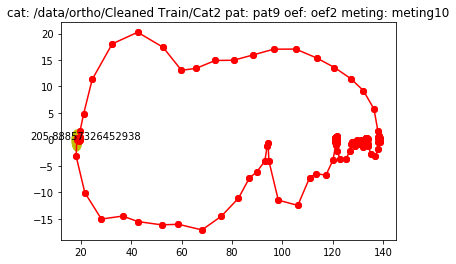

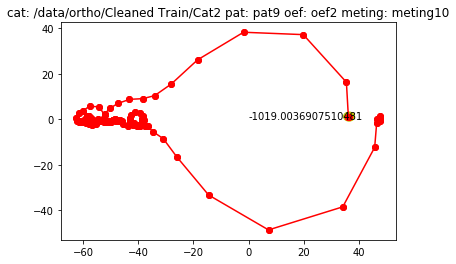

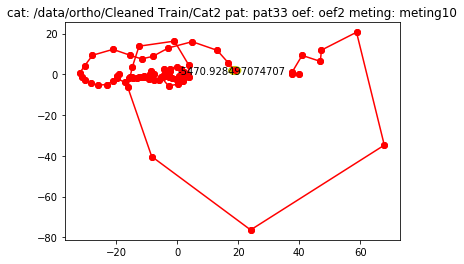

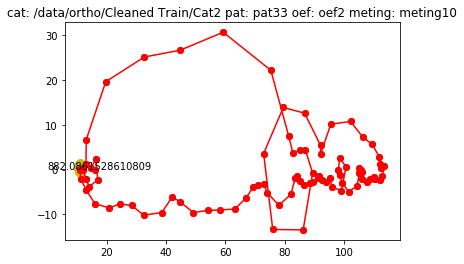

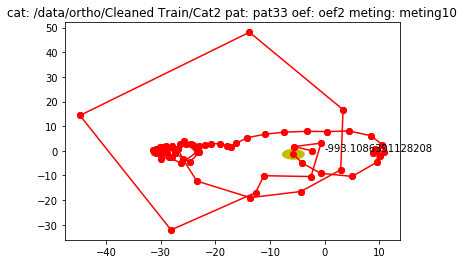

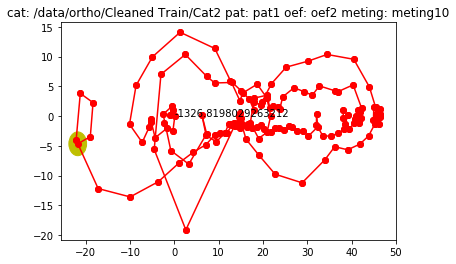

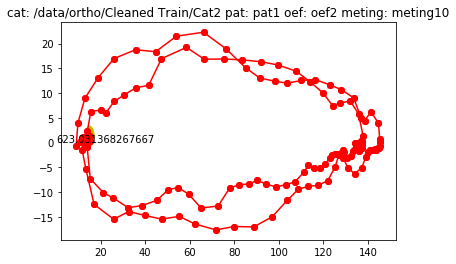

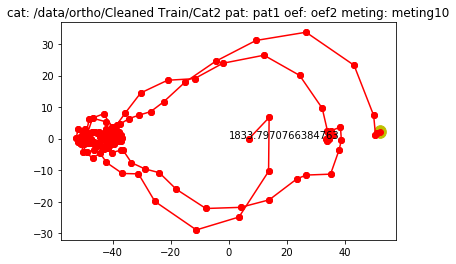

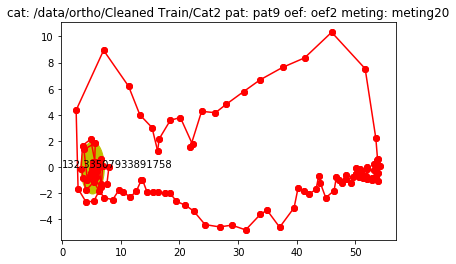

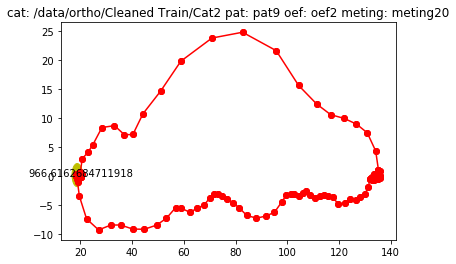

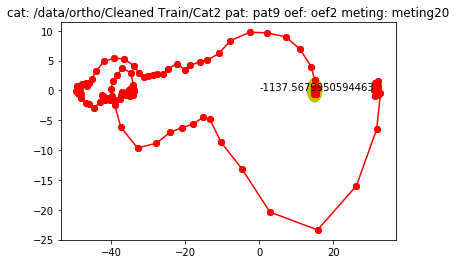

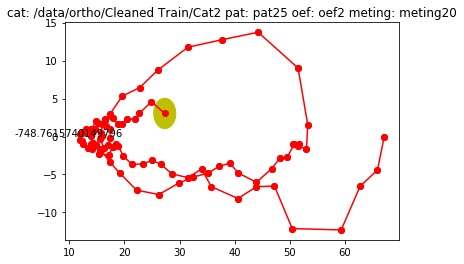

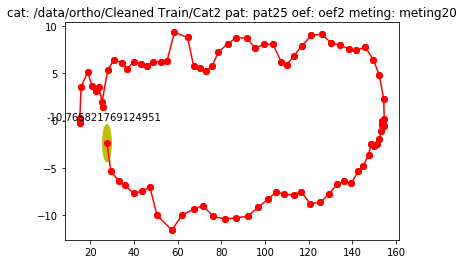

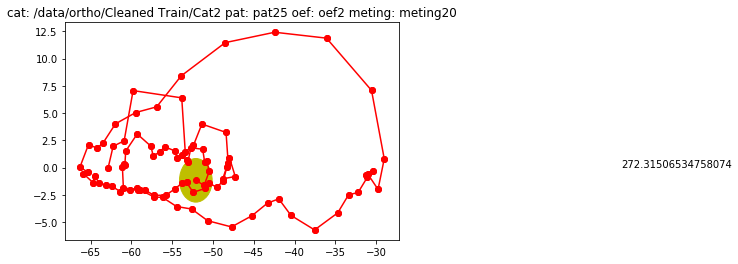

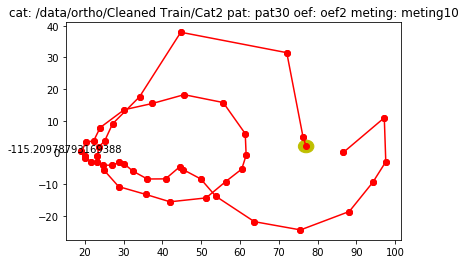

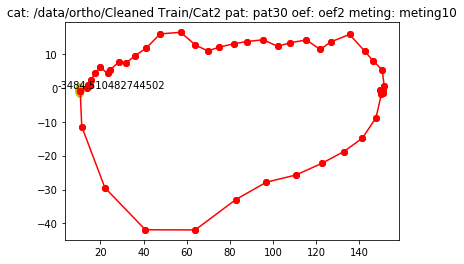

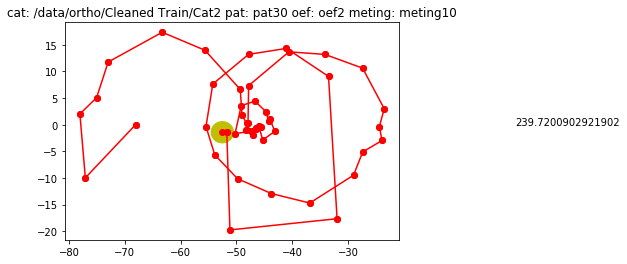

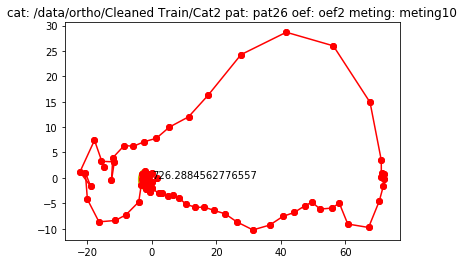

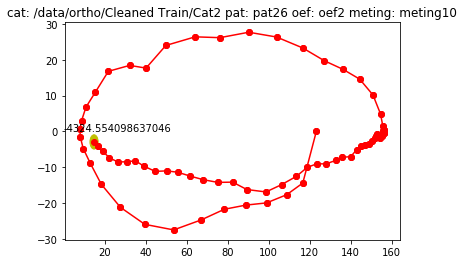

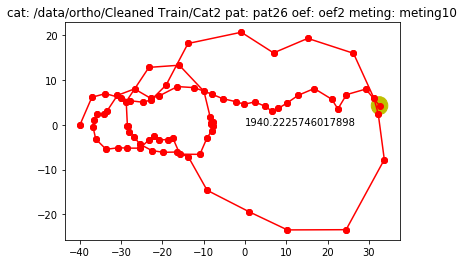

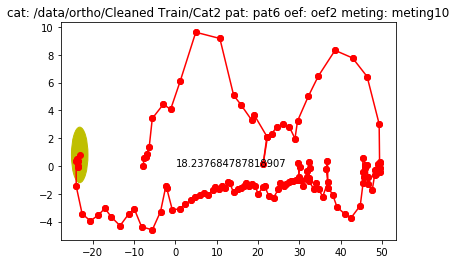

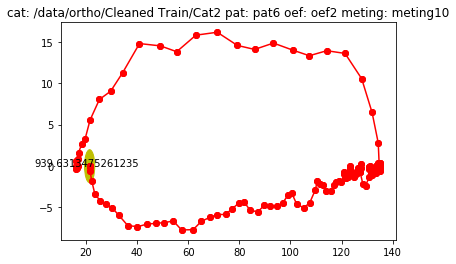

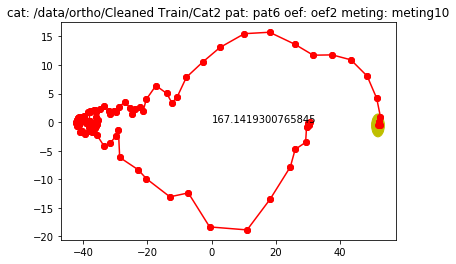

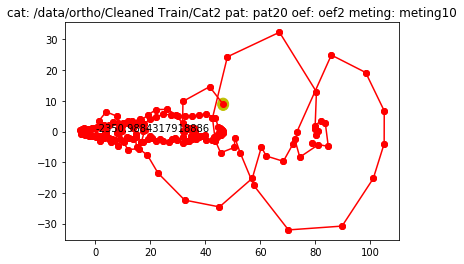

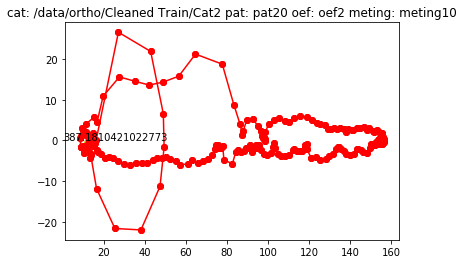

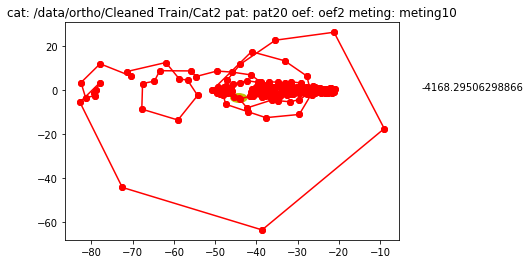

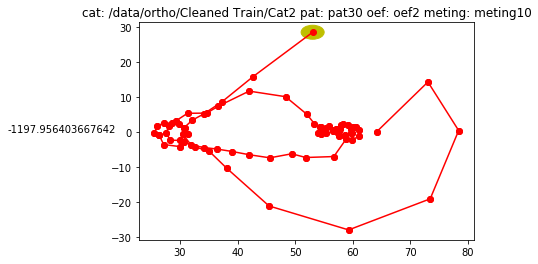

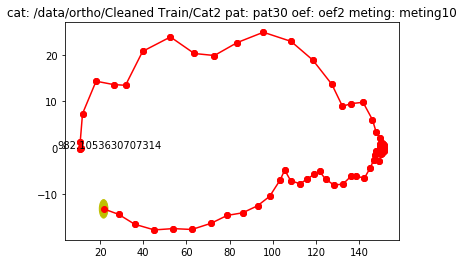

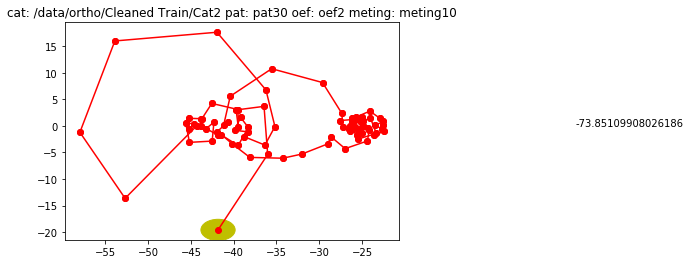

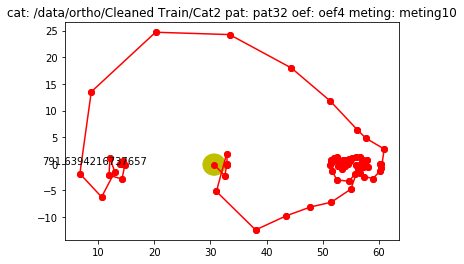

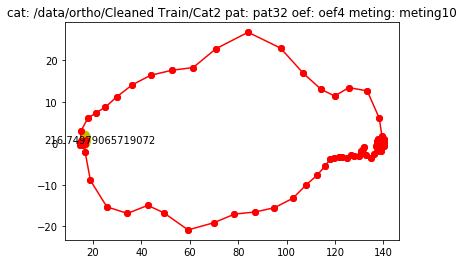

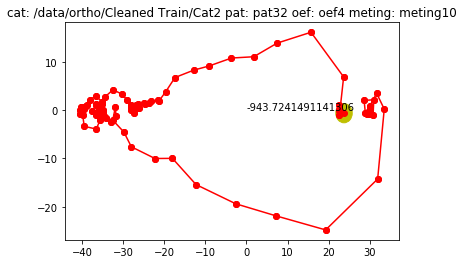

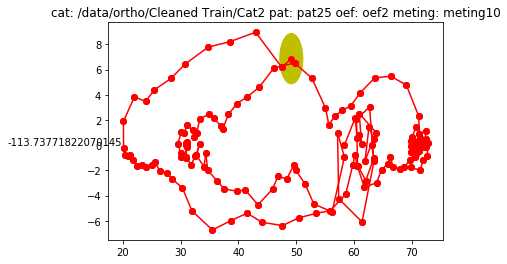

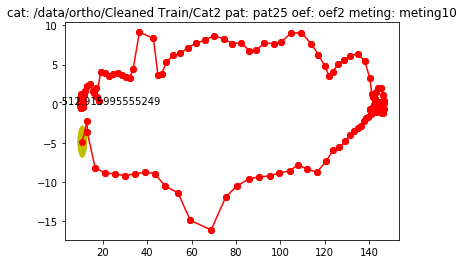

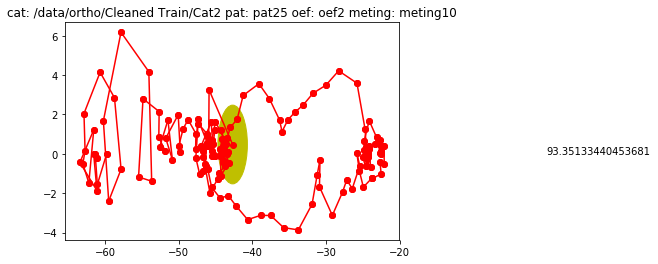

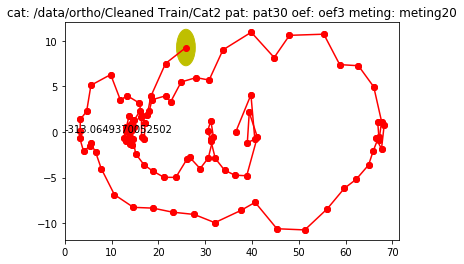

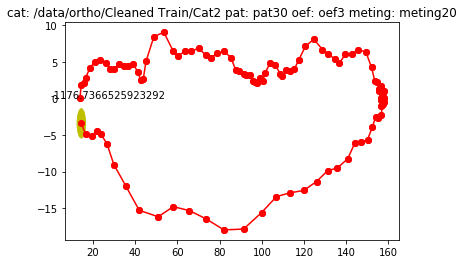

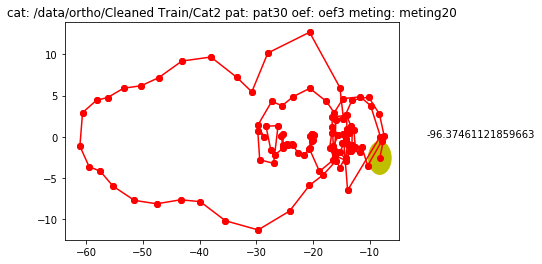

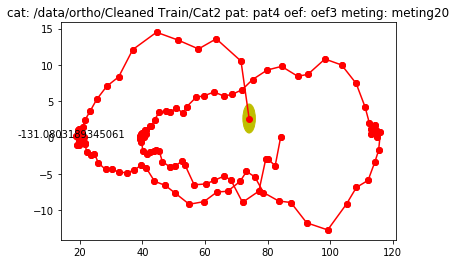

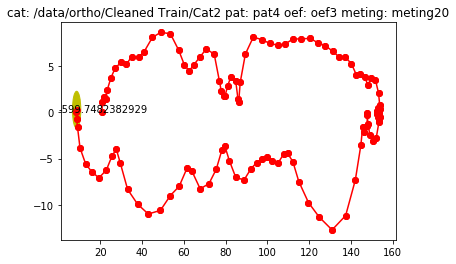

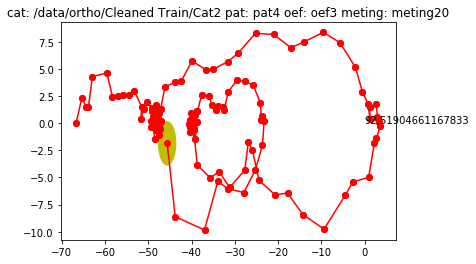

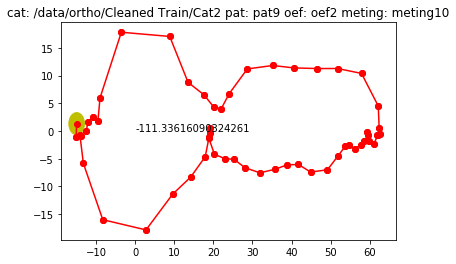

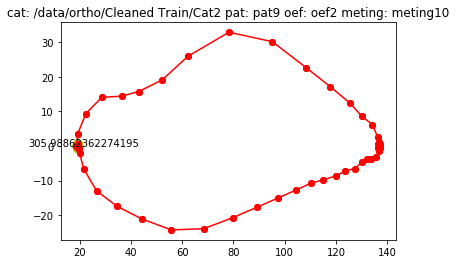

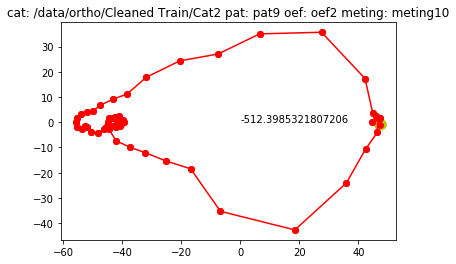

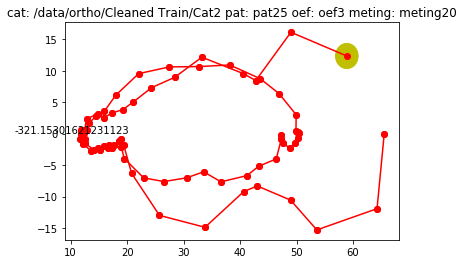

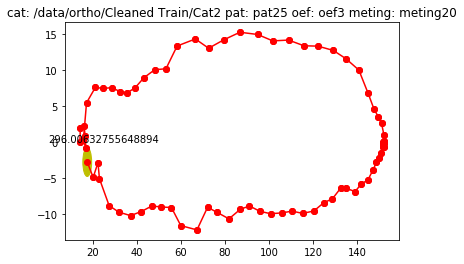

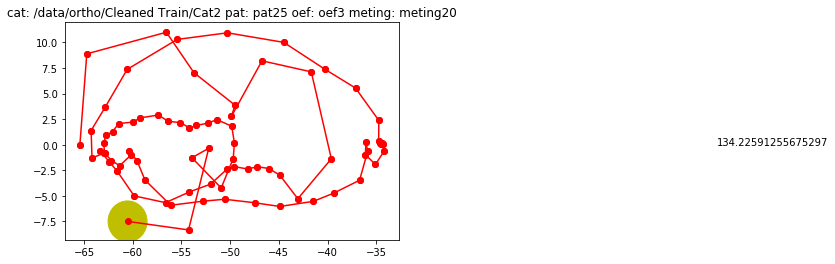

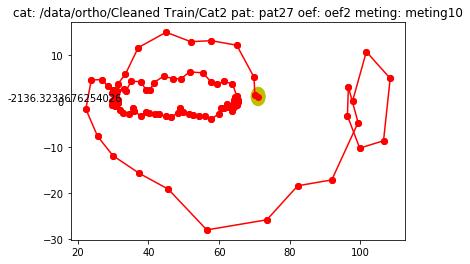

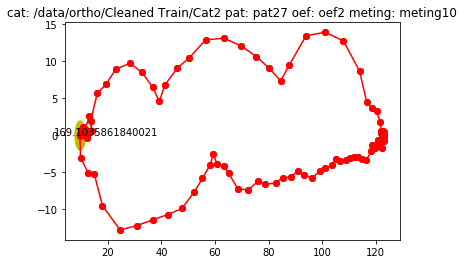

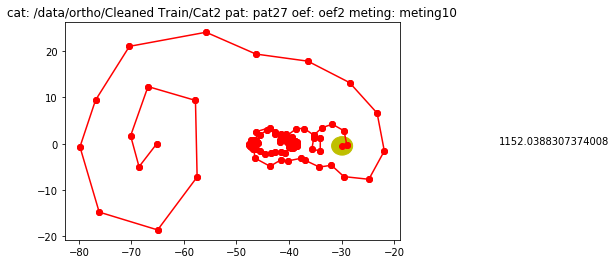

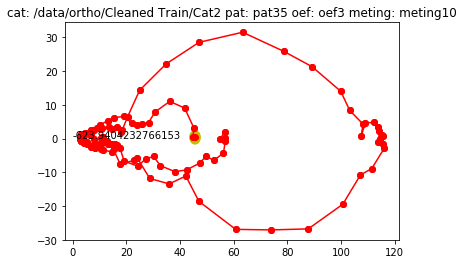

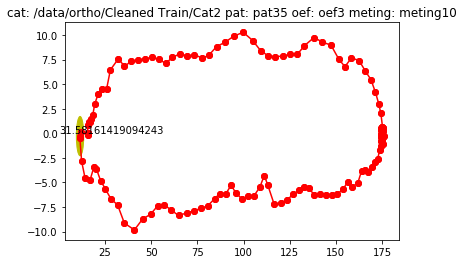

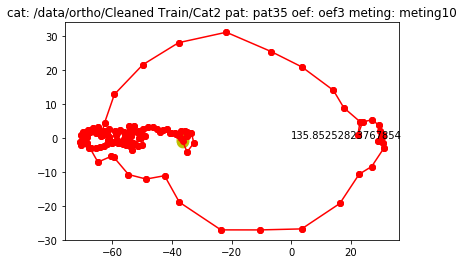

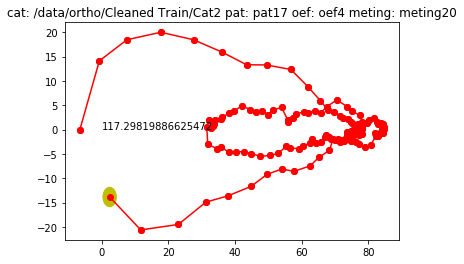

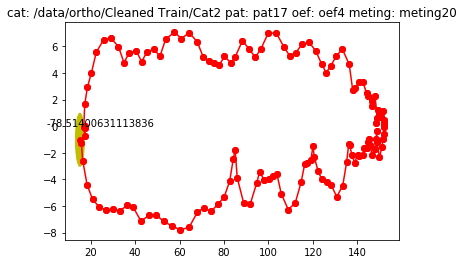

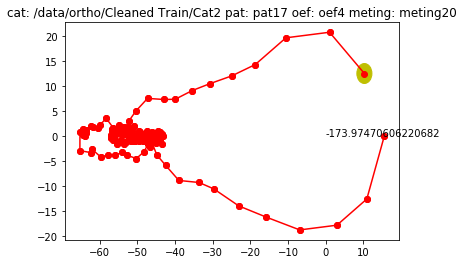

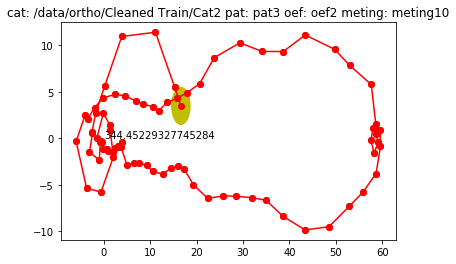

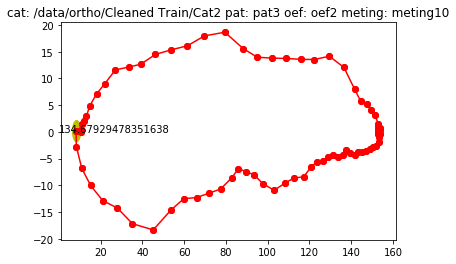

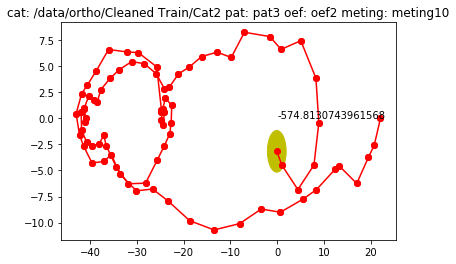

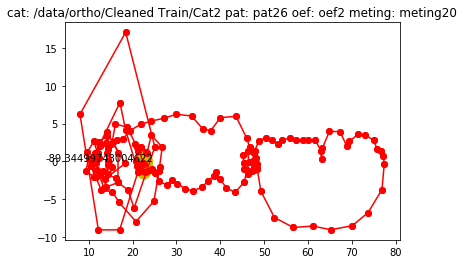

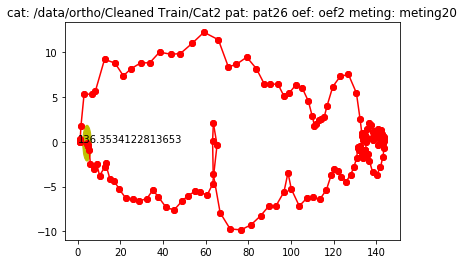

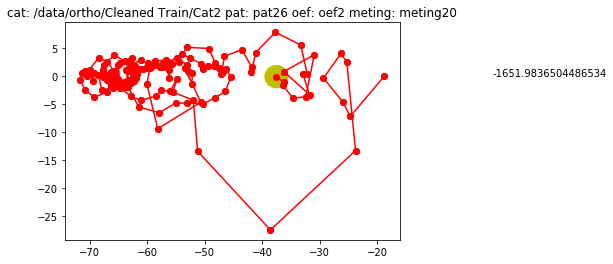

In [8]:
PatientFiles = CreateList(['meting', 'Cat2'])
# print(PatientFiles)
kasper = ['../EH1_cleaned.csv', 
          '../RF1_cleaned.csv']
# x, y, z = ("thorax_r_x","thorax_r_y", "thorax_r_z")
# x, y, z = ("clavicula_r_x", "clavicula_r_y", "clavicula_r_z")
# x, y, z = ("scapula_r_x", "scapula_r_y", "scapula_r_z")
x, y, z = ("humerus_r_x", "humerus_r_y", "humerus_r_z")
# x, y, z = ("ellebooghoek_r", "ellebooghoek_l", "ellebooghoek_r")

# Print eerst de twee items van kasper, dan de gefilterde lijst
VisualizeItems(PatientFiles, x, y, z)

In [ ]:
plt.clf
x = [1,2,3,4,5,6,7,8,9]
y = [1,8,2,8,8,2,6,8,2]
t = np.arange(0., 5., 0.2)
# for i in range(0, len(x), 1):
#     plt.plot(x[i:i+2], y[i:i+2], 'ro-')
plt.plot([1,1.1], [1,1.1], 'r--')

# plt.scatter(x, y, c='B')
plt.show()
t

In [ ]:
circle1 = plt.Circle((0, 0), 0.2, color='r')

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_artist(circle1)
plt.show()

In [ ]:
data